<a href="https://colab.research.google.com/github/COTILab/MCX24Workshop/blob/master/Training/MCX2024_1C_mcx_command_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Workshop Logo](https://mcx.space/wiki/upload/mcx24_logo.png)
# MCX Training Workshop 2024 - Day 1, Session 1C

## Session 1C: A Tutorial on Running MCX in Command-line Mode



## <font color='orange'>Step 0: Setting up MCX and Octave environments within Google Colab</font>

> **You must rerun all cells in Step 0 in appearance order when you start a new session, or after reconnect to a runtime**

To run interactive Octave sessions inside a Google Colab Jupyter Notebook environment, we need to install the following dependencies
- GNU Octave via `sudo apt-get install octave`
- Oct2py Python module via `pip install oct2py`, and
- enable Oct2py in Jupyter Notebook via "magic command" `%load_ext oct2py.ipython`

<font color='green'>If you run this on Google Colab, please go to menu **Edit\Notebook Settings\Hardware accelerator**, and verify if it has already selected "GPU"; if not, please select the T4 GPU.</font>

**Please note**: MCX/MCXLAB is GPU-accelerated. This notebook by default requests an NVIDIA GPU. Howevever, when you click on the run-button for the below section, your browser may fail to allocate a GPU runtime and ask you if you want to continue with a non-GPU runtime. If you choose to proceed without GPU support, you will have to run the [section immediately following the next section](#mcx_setup_opencl) to install OpenCL-based MCXLAB (called mcxlabcl) and utilize the CPU to run the rest of the tutorials. The OpenCL version of MCXLAB will work for all examples, but will be substentially slower to run (this tutorial also reduces the photon numbers accordingly to lower the runtime).

In [ ]:
#@title Init 1: Initial setup of environment for running MCXLAB (run the below section once)

# install octave and oct2py
! apt-get update && apt-get install octave jq libpocl2 pocl-opencl-icd libnvidia-compute-535   # install octave (a free matlab clone), jq and OpenCL runtimes
! python3 -m pip install oct2py jdata bjdata matplotlib   # install oct2py, jdata, bjdata and matplotlib Python modules

# add octave support to colab notebook
%load_ext oct2py.ipython

# download and unzip MCXStudio
! rm -rf MCXStudio*
! curl https://mcx.space/nightly/release/MCX24/MCXStudio-linux-x86_64-nightlybuild.zip -O MCXStudio-linux-x86_64-nightlybuild.zip # download MCX suite
! unzip -o MCXStudio-linux-x86_64-nightlybuild.zip && rm -rf MCXStudio-linux-x86_64-nightlybuild.zip # unzip MCX suite

# add executable to the shell's paths
! cp -a "$PWD/MCXStudio/MCXSuite/mcx/bin/mcx" "/usr/local/bin"
! cp -a "$PWD/MCXStudio/MCXSuite/mcxcl/bin/mcxcl" "/usr/local/bin"
! cp -a "$PWD/MCXStudio/MCXSuite/mmc/bin/mmc" "/usr/local/bin"
! cp -a "$PWD/MCXStudio/MATLAB/zmat/octave/gnu-linux-x86_64/zipmat.mex" "$PWD/MCXStudio/MATLAB/zmat/"

# if a GPU runtime can not be allocated, run this section to setup OpenCL and MCXLAB-CL
! [[ ! -f `which nvidia-smi` ]] && mv "/usr/local/bin/mcxcl" "/usr/local/bin/mcx"
! mcx -L

### <font color='orange'>Init 2: Only need to run this once at the beginning</font>

In [ ]:
%%octave
addpath([pwd filesep 'MCXStudio/MATLAB/mcxlab']);                 % add path to mcxlab
addpath([pwd filesep 'MCXStudio/MCXSuite/mcx' filesep 'utils']);  % add path to mcx helper functions
addpath([pwd filesep 'MCXStudio/MATLAB/mmclab']);                 % add path to mmclab
addpath([pwd filesep 'MCXStudio/MCXSuite/mmc' filesep 'matlab']); % add path to mmc helper functions
addpath([pwd filesep 'MCXStudio/MATLAB/iso2mesh']);               % add path to iso2mesh/jsonlab
addpath([pwd filesep 'MCXStudio/MATLAB/brain2mesh']);             % add path to brain2mesh
addpath([pwd filesep 'MCXStudio/MATLAB/redbird-m/matlab']);       % add path to redbird-m
addpath([pwd filesep 'MCXStudio/MATLAB/zmat']);                   % add path to zmat for data compression

if(system('which nvidia-smi'))                   % if this runtime does not have NVIDIA GPU support
    addpath([pwd filesep 'MCXStudio/MATLAB/mcxlabcl']);    % add path to mcxlabcl
    USE_MCXCL=1;                                 % set USE_MCXCL flag in the base workspace
end

### <font color='orange'>Init 3: Verify your environments</font>

---

In [ ]:
%%octave
which mcx
which s2m
which zipmat

mcxlab('gpuinfo')     % use this command to list supported CPU or GPU in octave
unix('mcx -L')        % use -L flag to list GPU in the command line

# MCX Command Line Primer

## Why you want to run mcx in the command line

- **self-contained**: get the work done without needing other software
- **batch mode**: automated simulations for many jobs
- **large-scale simulations**: utilizing advanced hardware, such as GPU clusters
- **run from anywhere**: just need a terminal, no graphics needed

## Listing help info

In [ ]:
!mcx

## Listing CUDA-compatible GPU

In [ ]:
!mcx -L

## Listing and running a built-in benchmarks

---

`mcx` contains a list of built-in benchmarks serving as easy-to-start examples. You can use the `--bench` flag to list all built-in benchmarks

In [ ]:
!mcx --bench

## Understanding mcx simulation log


---


When you provide a benchmark name following the `--bench` flag, mcx runs the benchmark for you. Let's take a look at the output and try to understand the simulation log.

In [8]:
# running mcx or mcxlab for the first time will be slow (~10s), running again will become fast (~0.2s)
!mcx --bench cube60

###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

For every executed simulation, mcx prints a text-based log as shown above. You can see various information in this log.

The header of the log provides some basic information and links, including an acknowledgement to our NIH funding source that had supported the development of this software.

Near the end of the log header, you can see a line like
```shell
$Rev::d66a0a$v2024.6 $Date::2024-06-11 18:30:04 -04$ by $Author::Qianqian Fang$
```

This line is automatically generated by our software compilation script to indciate the version of the binary you are using. The `$Rev::d66a0a` shows the github commit hash that is used to build this binary. This is followed by an official release name `v2024.6`; the source code date string `$Date::2024-06-11 18:30:04 -04$` provides the time when the github commit `d66a0a` was made. Finally, the author of the commit is listed at the end.

Below the header, the two following lines indicate the CUDA toolkit version (nvcc [7.5]), the lowest supported CUDA Compute Capability (CC=[350] means CUDA devices with CC 3.5 - Kepler - or above can run this binary), the date when the binary was compiled ([Jun 15 2024] - this may be different from the commit date above). `mcx` supports multiple GPU random-number-generators (RNGs). The RNG compiled here is `[xorshift128+]` which is the default RNG. The `Seed Length [4]` field suggests that this RNG needs a 4x 32bit WORD = 128 bit seed.

`mcx` executable is **forward comaptible to future generations of NVIDIA GPUs**. This is because the MCX CUDA code is compiled into an intermediate-level "assembly code", [called PTX](https://en.wikipedia.org/wiki/Parallel_Thread_Execution), that will be dynamically recompiled on whatever new GPU architecture that runs MCX to create the low-level GPU assembly code for execution. This means a single MCX executable can run across nearly all generations of CUDA GPU devices, even the future generations.

In the following section
```shell
GPU=1 (Tesla T4) threadph=12 extra=16960 np=1000000 nthread=81920 maxgate=1 repetition=1
```
the used GPU (Tesla T4) is printed. The total simulated photon number `np` is 1e6, simulated by a total number (`nthread`) of 81920 of GPU threads, with each thread running 12 photons (`threadph=12`), and 16960 out of the 81920 threads needs to run one extra photon to complete the total desired photon number (`threadph*nthread+extra=np`).

the next line
```shell
requesting 1792 bytes of shared memory
```
suggests that this mcx simulation requires 1792 bytes of shared memory - fast memory that can be accessed within a thread-block - used by mcx to store detected photon data. For modern NVIDIA GPUs, the total amount of shared memory is limited to 48KB to 227KB [depending on the GPU architecture](https://en.wikipedia.org/wiki/CUDA#Technical_Specification).

Next, you can see the simulation log
```shell
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ...
kernel complete:  	125 ms
retrieving fields ... 	detected 2997 photons, total: 2997	transfer complete:	144 ms
```
the first line prints the start/end simulation time window (0-5 ns). The rationales for setting the maximum simulated timegate can be found below.

The timing data printed above are elapsed time from the initialization of the CUDA device. You can see that the simulation of 1e6 photons on this Tesla T4 GPU takes only about 1/8 of a second (125 ms), which is fairly fast.

The last line report the data-copy time from the GPU memory to the host (CPU) - it takes roughly 10 ms = 134 - 125 ms to complete. Because the benchmark defines detectors, the retrieved data also include detected photon data - with a total count of 2997 photon packets reaching the detector.

```shell
normalizing raw data ...	source 1, normalization factor alpha=200.000000
```

By default, mcx normalizes the output fluence map so that the total simulated photon packet weight, regardless of the photon numbers used, is always 1 joule or Watt. This allows us to directly compare mcx's fluence output to the analytical expressions, i.e. the Green's function, of the diffusion or RTE models. When normalization is used, mcx log reports the normalization factor, `alpha` which is used as a multiplier to the raw data to complete the normalization - you can undo this by dividing alpha from the output

```shell
saving data to file ...	compressing data [zlib] ...compression ratio: 91.0%	after encoding: 121.3%
saving data complete : 182 ms

compressing data [zlib] ...compression ratio: 10.9%	after encoding: 14.6%
compressing data [zlib] ...compression ratio: 52.1%	after encoding: 69.5%
```
Starting in MCX v2023, mcx stores the output volumetric data using open-standard defined by the NeuroJSON project in the form of human-readable JSON/JNIfTI format. This allows the output data to be easily shared between programming environments such as MATLAB/Python. It automatically applies data compression to the output, so that the data file is compact in size. The above log shows the data compression ratio - the first line shows the storage of the fluence data in a JNIfTI file (`.jnii`), and the last two lines shows the compression of detected photon data as a `.jdat` file.

The final section of the log is very important.
```shell
simulated 1000000 photons (1000000) with 81920 threads (repeat x1)
MCX simulation speed: 9174.31 photon/ms
total simulated energy: 1000000.00	absorbed: 17.69161%
```
We especially highlight two numbers - the **simulation speed** in the unit of photon-per-millisecond (`9174.38 photon/ms`) and **total absorption fraction** `absorbed: 17.69161%`. The first number of a crucial indicator to the computational performance of MCX and your GPU hardware. Of course, the more efficient the mcx simulation code, the more powerful your GPU is, the higher this number is. Before the use of GPU based MC simulations, the single-threaded CPU simulation speed is typically below a few dozen photon/ms. This has been dramatically improved by using mcx/GPU for MC simulation.

The second metric, **total absorption fraction**, is a coarse-grained quality metric that we have frequently used in the past to validate and compare simulations. The absorption fraction is simply the ratio of total absorbed energy in the medium divided by the total simulated/launched energy. When running increasing number of photons, we expect this number to asymptotically converge to a charastistic value (may not be unique) that is associated with this particular simulation. Becaus of this, we have been using this number as a tool to test the validity/stability of mcx simulation in our built-in [unit-testing script](https://github.com/fangq/mcx/blob/master/test/testmcx.sh). Please be aware that this number may not be stable due to random noise when the simulated photon number is small. Developers of other MC or optical simulation tools can also use this metric to compare their outputs with those of MCX.

The last line in the log
```
(loss due to initial specular reflection is excluded in the total)
```
suggests that when the light source is launched from the background medium (air with `n=1`) to a non-air medium (`n>1`), unless the `-V` or `--isspecular` command line flag is set to 1 (by default, it is set to 0), `mcx` ignores the specular reflection of the initial incident beam and considers 100% of the launched energy entering the non-air medium. This means the total absorption fraction printed above does not include the initial energy loss due to specular reflection.

When `--isspecular 1` use used, mcx subtracts the energy-loss due to specular reflection to the photon's initial packet weight when transmitting the photon from air to non-air voxels. To other MC developers: when you compare your solvers with mcx, please take the above convention into your comparison.

## Understanding mcx's input file

---
MCX is a rigirous physics solver for the radiative transfer equation (RTE) that is the generalized model describing light propagation inside complex random media, including human tissues, transparent/translucent medium or extremely absorbing materials.

For every simulation, mcx asks users to provide a JSON based input file to completely define the simulated physical problem, including details such as
- **what is the size of the domain?** - mcx uses a voxelated 3D array to represent a 3D simulation volume, the size of the domain is decided by giving the dimension of the 3D array and voxel size
- what are the **media/tissue types** present in the domain?
- what are the physics-based **optical properties** of each medium/tissue?
   - absorption coefficient `mua` (1/mm)
   - scattering coefficient `mus` (1/mm)
   - anisotropy `g` (unitless)
   - refractive index `n` (unitless)
- what is the **light source position** and **photon launch direction** as well as the **type of the illumination**?
- what is the **time window and time-gate** that you want to simulate light propagation?
- if you have detectors, what are the **detector locations and radii** (detectors are assumed to be spherical/disk shaped)?
- what **type of output** do you want mcx to generate? light fluence? fluence rate? energy-deposition?
- other information such as session name, which GPU to use (if multiple GPUs are available), number of threads, thread-block size, etc.

For any simulation, you can use `mcx --dumpjson` to export all simulation settings into a single JSON based human-readable input file so that you can share or edit it to create new simulations.

For example, for the built-in benchmark `cube60` we ran previously, you can dump the JSON representation of the entire simulation settings using the below command

In [ ]:
!mcx --bench cube60 --dumpjson > cube60_input.json  # we export the simulation settings print it to a text file named cube60_input.json
!cat cube60_input.json

Let's first understand the overall structure of the MCX input file.

MCX input file is a human-readable JSON file that can be directly edited using a text editor - such as vi, nano, emacs, VSCode, gedit, notepad, notepad++, pspad, among many others. However, for the purpose of this tutorial, in the below sections, we use a commandline tool, called [jq](https://jqlang.github.io/jq/), to conveniently print and manipulate JSON keys and values, so we can automate our demonstration. The command `jq` is widely available among Linux/Windows and Mac, but you don't have to use it. Again, you can use a text-editor to open the .json file and edit it manually.

First, let's understand the top-level elements of the MCX JSON input file.

There are 5 (strictly-speaking, 4) required root-level objects in the JSON input file, see below. The MCX JSON input file can contain more than these 5 required fields, but mcx does not interpret or parse those additional data fields. For example, one can add a root-level object
```javascript
{
  "Help":{
    "[en]":{...}
  },
  ...
}
```
to include self-descriptive help information in English language, as we used in our [README file](https://github.com/fangq/mcx/blob/v2023/README.md#using-json-formatted-input-files).

In [ ]:
!jq 'keys' cube60_input.json

[
  "Domain",
  "Forward",
  "Optode",
  "Session",
  "Shapes"
]


### "Domain"

Let's take a look at the first object, `"Domain"`. **Domain** defines the simulation physical domain and their optical properties. The content of the Domain field is printed below.

In [ ]:
!jq '.Domain' cube60_input.json

Let's look at `"Dim": [nx, ny, nz]` and `"LengthUnit": 1` first. The integer vector `"Dim"` defines a voxelated grid space with nx * ny * nz voxels. The scalar `LengthUnit` field defines the voxel-edge-length in mm. In this case, our simulatin domain is a (60x1mm)x(60x1mm)x(60x1mm) cubic space. mcx uses the voxels to accumulate the output fluence data.

As one can see, for the same 6x6x6cm^3 homogeneous physical space, one has multiple choices of setting `Dim` and `LengthUnit` to achieve the same physical domain, for example, one can use `"Dim": [20, 20, 20]` with `"LengthUnit": 3`, or `"Dim": [600, 600, 600]` with `"LengthUnit": 0.1`.

#### 🗣 *Best Practics Guide - domain size*

>A **common mistake** that we have often see from an mcx benginer is to build their initial simulation around a high-resolution voxelated space, with a misconception that this will give a "better" result.
>
>It is correct that `mcx` is capable of handling large/high-resolution domains as long as your global memory is large enough to fit the simulation data. However, it CAN handle it does not mean it SHOULD be used without the understanding on the benefits and risks.
>
>An MCX user should always keep in mind that mcx is a Monte Carlo simulator, that means it depends on the ["Law of large-numbers"](https://en.wikipedia.org/wiki/Law_of_large_numbers) to obtain relible simulations for each output data point - for any output data stored in a voxel, mcx relies the fact that the output value will only converge to a stable "expectation" or mean value when there are sufficiently large number of photons passing by that voxel. Imagine that you reduce your voxel-edge-length by a factor of 2, i.e. changing from `"LengthUnit":1` to `"LengthUnit":0.5`, while keeping the domain physical size the same. This changes the voxel count from 60x60x60 to 120x120x120, resulting an 8x increase. If we simulate the same number of photons, one can imagine that the photon packets that pass by each voxel becomes roughly 8x less in the 120^3 domain vs the 60^3 domain. The less photon count that contributes to each voxel makes the stored data noisier (thus unreliable). To make each voxel data in the 120^3 domain to have the same signal-to-noise ratio (SNR), one must simulate 8x more photons.
>
>Not just that one needs to simulat more photons, propagating the same photon path in a dense 120^3 grid requires 8x more ray-voxel intersection calculations due to the more frequent intersections with the voxel walls. This translates to a roughly 8x slow-down of the computation. Combining both factors, achiving the same "quality" of the simulated data, the 120^3 grid requires 8x8=64x longer simulation time compared to the 60^3 grid. **Running simulation in refined voxel grid imposes one of the most signficiant overhead**, which grows rapidly, over growing voxel sizes.
>
>For beginners, you must first ask yourself, do you really have to use a high-resolution voxelated grid? what is minimum of voxel size that can reasonably represent the geometry feature of the object you are trying to simulate? It is the recommended practics to start your simulation with a coarse/low resolution grid (ideally, below 100 in each dimension, the smaller the better), and refine it once to see if your results changes or not, and stop at the voxel size that a refinement of the voxel does not alter your result.

Next, the `"Media"` subfield of the `"Domain"` object defines the optical properties.

MCX supports 7-8 different media formats, but the most commonly used media format is "label" based media. In this format, each voxel stores a single non-negative integer to represent the "medium type" of the voxel.

Label 0 has a special meaning in mcx - it represents the "background" medium. The space outside of the voxelated domain bounding-box is considered to be filled with the background medium, so are the voxels carrying a 0 value as the type.

`"Media"` is an array with NL+1 elements, where NL is the maximum label value (or tissue types) in the domain, and the extra 1 denotes the 0-valued label as the background medium. For each element of `"Medium"`, it must contain 4 keys, `mua`, `mus`, `g` and `n` to specify the absorption coefficient `mua`, scattering coefficient `mus`, anisotropy `g` and refractive index `n` of the corresponding tissue label, staring the first one with label-0.

Please be aware that **`mua` and `mus` values must be specified in the 1/mm unit**, regardless of the voxel size (`"LengthUnit"`) of the domain.

#### 🗣 *Best Practics Guide - background medium*

>One must be careful because `mcx` treats 0-valued voxels differently compared to other non-zero labels.
>
> When a photon escapes from a non-zero label to a 0-voxel, mcx assumes the photon will never return back to any non-zero voxels, thus starts photon detection calculations and then terminate the photon. This may have signficance in the case of a cavity or void inside a domain. If one sets the voxels inside a cavity as 0-label, this terminates all photons that reaches the cavity surface, and prevents them from passing through the cavity and continuing propagating in other part of the medium, resulting in incorrect simulations.
>
>The correct way to handle a cavity is to define it as a non-zero label, and set the corresponding optical properties to those of air, i.e. `mua=0/mm, mus=0/mm, g=1, n=1`. This allows photons to pass through the void and continues its path.

Lastly, let's understand `OriginType`. Due to historical reasons, mcx uses MATLAB-styled voxel index (starting from 1) to specify source/detector positions among other parameters. This is equivallently saying that the bottom-lower-corner of the first voxel of the grid has a coordinate of `[1,1,1]`. Under this convention, the source position `[31,31,1]` is located exactly at the center of the bottom face of this 60x60x60 grid. In some simulations, this convention has caused some confusions.

To avoid such confusion, we have added the command line flag `--srcfrom0 1`, as well as the `"OriginType":1` to allow a more natural convention, where the lower-bottom-corner of the first voxel has a coordinate of `[0,0,0]` instead of `[1,1,1]`. Under this convention, the source that is located exactly at the center of the bottom face of a 60x60x60 domain should be `[30,30,0]` when `"OriginType"` is set to 1.

It is highly recommended to set this flag to 1 whenever possible. In the future, we may make this as the default setting. Unfortunately, one must explicitly set this flag to use the new origin convention (i.e. `[0,0,0]` as the origin).

### "Forward"

The "Forward" root-level object is relatively simple, it only contains 3 useful parameters specifying the time-gate settings of mcx simulation

In [ ]:
!jq '.Forward' cube60_input.json

{
  "T0": 0,
  "T1": 4.99999996961265e-09,
  "Dt": 4.99999996961265e-09
}


The "T0", "T1" and "Dt" scalar fields defines the start, end and interval of simulation time in the unit of second (s), respectively. In this case, we ask mcx to simulate photons between 0 and 5 ns, and accumulate the results in a single time-bin convering the entire 5 ns time window. If the "Dt" value is set to 1e-9 s, the output fluence will contain a 4D array, with Nx*Ny*Nz*Nt where Nt is the number of time-gate, which in this case is (T1-T0/Dt)=5.

#### <font>🗣 *Best Practics Guide - maximum time window*

>The T1 value should be decided based on the domain physical size, the scattering coefficient of the medium and the lossiness (absorption) of the medium. It is not necessarily setting the large the T1 value will bring more accurate steady-state photon distribution.
>
>We often use a maximum simulation time window of 5 ns in our examples - in water (n=1.33) or tissue-like medium (n=1.37), this allows light to travel ~1.1 meter total path length. In tissue-like medium, due to extremely high scattering, this time should allow light to diffuse and fill a ~10 cm^3 volume and obtain a steady-state solution. One can adjust the time-window length according to the medium domain and scattering setting you have - but more than 5-10 ns may not bring much benefit in absorbing medium because photon packet weight drops exponentially along the path. Letting a low-weight photon to continue propagation results in little change to the light fluence profile while consuming computational time.

### "Optode"

The word "Optode" refers to an optical source or detector. Therefore, as the anme suggests, the "Optode" object specifies the light source and detector settings.

"Optode" has two child objects, "Source" which is required, and "Detector", which is optional.

In [ ]:
!jq '.Optode' cube60_input.json

`mcx` supports over a dozen source types, specified by the string value of the `"Type"` key. The default source type, if not specified, is the `"pencil"` beam - defining a point-source with location specified by a 1x3 `"Pos"` vector, and a launch direction specified by a 1x3 `"Dir"` unit vector.

The `pencil` beam source is completely defined with the `Pos` and `Dir` settings. However, for some other advanced source types, such as `fourier`, `planar`, `disk`, `cone` or others, one must use the additional source parameter fields, `"Param1":[v1,v2,v3,v4]` and `"Param1":[u1,u2,u3,u4]`, to pass on source-type-specific parameters.

For example, if the source typ eis set to to `"cone"`, an half-angle in rad unit must be specified by the first value of the `"Param1"` vector.

MCX supports two ways of capturing detected photons (can be used together) - a disk-shaped detector specified by the `"Detector"` section inside `"Optode"`, or a boundary bounding-box facet based detector specified by the `--bc` parameter of the "BCFlags" fields under the "Session" section (see below).

Here, we want to describe the first type of detector. MCX's detector is optional - if detector is not specified, mcx does not return the detected photon data. However, if one wants to set disk-shaped detectors, one must define each detector by two fields: a 1x3 "Pos" vector specifying the center position of the detector, and a scalar "R" specifying the radius of the detector. **Both the "Pos" and "R" values are in voxel unit**, not in physical length unit. This means it must be scaled by the voxel size ("LengthUnit") to match their physical values.

One can imagine a detector as a spherical bubble centered at `"Pos"` with a radius of `"R"`. This spherical bubble **must have an intersecting cross-section** with the tissue-background boundaries - which includes
- **the voxelated domain bounding box surfaces**, if the entire domain is filled with non-zero labeled medium
- **or the voxel surface boundary interfacing between 0-valued and non-zero valued voxels**


#### 🗣 *Best Practics Guide - detector placement*

>**Why the detector bubble must intersect with the tissue bounary?** this is because photon detection calculations are only triggered before a photon is being terminated - which is done after a photon moving from a non-zero voxel to a 0-voxel or outside of the domain bounding box. Photon detection implies the termination of the photon because it does not make physical sense that a detected photon can continue propagation. Therefore, a valid detector must be placed along the tissue-background boundary in order to capture any detected photon.
>
>If the distance between the center ("Pos") of a detector to the nearest tissue-background boundary is more than "R", this detector will never detect any photon.
>
>One should double check with the "OriginType" setting mentioned above to make sure a detector is placed properly along the tissue boundary. A undesired offset of 1 voxel may deactivate some of the detectors (mcx will give a warning if this happens).
>
>**What happens if multiple detectors have overlapping areas?** mcx sequentially tests the distance of a photon exiting position to decide which detector encloses it. If a photon exiting from an overlapping area between multiple detectors, the detector that has the lowest index captures the photon.
>
>Using the above principle, one can define a series of annulus/ring shaped detector by placing concentric detectors with overlapping "Pos" but increasing "R" values.

### "Session"

The `"Session"` root-level object stores a collection of flags that can impact the photon handling of the simulation or user file input/output settings. These flags are considered **non-intrinsic** to the physical problem, rather run-time options that can be varied or adjusted to create different simulation modes.

For example, the `"ID"` field defines a string that is used to label the output file names. For example, setting `"ID":	"cube60"` results in the output volumetric data stored as `cube60.jnii`, the detected photon data file as `cube60_detp.jdat` etc.

The `"Photons"` field specifies how many photon packets to simulate. MCX simulatino runtime is linearly proportional to the photon numbers, therefore, the larger the nphoton number, the

In [ ]:
!jq '.Session' cube60_input.json

{
  "ID": "cube60",
  "Photons": 1000000,
  "RNGSeed": 1648335518,
  "DoMismatch": false,
  "DoSaveVolume": true,
  "DoNormalize": true,
  "DoPartialPath": true,
  "DoSaveRef": false,
  "DoSaveExit": false,
  "DoSaveSeed": false,
  "DoAutoThread": true,
  "DoDCS": false,
  "DoSpecular": false,
  "DebugFlag": 0,
  "SaveDataMask": 5,
  "OutputFormat": "jnii",
  "OutputType": "x"
}


#### 🗣 *Best Practics Guide - setting photon number*

>A common beginner's mistake is to start testing an MCX simulation with a large photon number without having the idea how long such simulation may take.
>
>The MC simulation is extremely computationally expensive. Even though it has been accelerated by thousands fold using GPU computing in MCX, it is still considered relatively slow for general purpose use (despite it provides the most accurate result). Because of this, one must be conscious on the time necessary to complete a desired simulation.
>
>Extended simulation time can be caused by
- 1) setting "Session.Photon" to a unrealistically large value without a justification,
- 2) modeling highly scattering medium,
- 3) modeling a large-sized physical domain relatively to the mean-free-path of photon,
- 4) use of mirror boundary conditions that extend the propagation path lengths,
- 5) use of very large and dense voxeled grid (see [earlier section](https://colab.research.google.com/drive/1MX4rC1my2znSYXCj8HgKmPEZzNxhZii3#scrollTo=_Best_Practics_Guide_domain_size)), and
- 6) use of low-end low-core-count non-dedicated GPUs
>
>It is highly recommended to start prototyping your simulation settings with a coarse voxelated grid with low photon numbers. Once you get some initial results and understand the noise level and convergence of the solutions, you can increase photon count when necessary. Do not start from the opposite direction.

### "Shapes"

The `"Shapes"` object defines the media inside the simulation domain. It supports two types of definitions

#### Shape-descriptors
"**Shape descriptors**" allow a user to construct a complex domain using combinations of simple geometries - spheres, boxes, slabs, cylinders etc.

Shape descriptors must be provided as a **JSON array** in the form of `"Shapes":[...]`
```javascript
  "Shapes": [
     {"Name":     "Test"},    // optional note, no affect to domain
     {"Origin":   [0,0,0]},   // set origin for all subsequent shapes
     {"Grid":     {"Tag":1, "Size":[40,60,50]}},  // initialize a 40x60x50 grid with label 1
     {"Sphere":   {"Tag":2, "O":[30,30,30],"R":20}}, //sphere centered at "O" with radius "R"
     {"Box":      {"Tag":0, "O":[10,10,10],"Size":[10,10,10]}}, // box with lower-bottom corner at "O" and x/y/z dimensions as "Size"
     {"Cylinder": {"Tag":2, "C0": [0.0,0.0,0.0], "C1": [15.0,8.0,10.0], "R": 4.0}},  // cylinder with axis between points C0 and C1, and radius "R"
     {"Subgrid":  {"Tag":1, "O":[13,13,13],"Size":[5,5,5]}}, // same as Box, inclusive of both ends
     {"UpperSpace":{"Tag":3,"Coef":[1,-1,0,0],"Equ":"A*x+B*y+C*z>D"}}, // half-space defined by the equation, "Equ" is a string note
     {"XSlabs":   {"Tag":4, "Bound":[[5,15],[35,40]]}}, // defines two x-slabs between x=5:15 and x=35:40, both with label=4
     {"ZLayers":  [[1,10,1],[11,30,2],[31,50,3]]} // defines 3 z-slabs, z=1:10 with label=1, z=11:30 with label=2, and z=31:50 with label=3
  ]
```

Each element in the Shape array is an object representing a single geometric primitive. The supported primitives include 3 types:
- Shape constructs: `Grid`, `Sphere`, `Cylinder`, `Box`, `XSlabs/YSlabs/ZSlabs`, `XLayers/YLayers/ZLayers`, `Subgrid`, `UpperSpace`;
- Coordinate system: `Origin` and
- Optional annotation: `Name`

For all shape constructs, they all have a property `"Tag"`, defining the medium label enclosed in the shape; Other properties defines the shape parameters.

When shapes cover overlapping space, shapes defined later in the list overwrites the shapes defined earlier.

The `"Grid"` object is special - it resets the entire domain and makes all preceeding shapes ineffective. As a result, typically you should define `"Grid"` as the first in the list.

Media definition priorities
- `--json '{"Shapes":[...]}'` > `"Shapes":[]` input > `Domain::VolumeFile` input
- when both `Domain::VolumeFile` and `"Shapes"` are defined, VolumeFile will be loaded first, and then modified by `"Shapes"`
- when both `"Shapes"` and command line flag `--json '{"Shapes":[...]}'` are provided, the `--json` setting are further parsed to overwrite the `"Shape"` input file settings


#### JSON/JData-based 3-D volume

The Shape construct can store a 3-D volume in the form of a JData/JSON based object (Note that this is JSON object `{}`, not a JSON array `[]`)

```javascript
  "Shapes": {
     "_ArrayType_": "uint8",
     "_ArraySize_": [40,50,60],
     "_ArrayZipType_": "zlib",
     "_ArrayZipSize_": 120000,
     "_ArrayZipData_": "...base64-encoded-binary-data..."
  }

```

Here is an example how to create such JSON-encoded volume in MATLAB/Octave

In [ ]:
%%octave

% a 40x50x30 all-one volume
vol = uint8(ones(40,50,30));
savejson('Shapes', vol, 'compression', 'zlib')

% a volume with two media types: 1 and 2
vol(20:40, 20:30, 10:15) = 2;
savejson('Shapes', vol, 'compression', 'zlib')

Here is an example how to create JSON-encoded volume in Python with `numpy`

In [ ]:
import numpy as np
import jdata as jd

vol = np.ones([40,50,30], dtype='uint8');
jd.show(vol, {'compression':'zlib'})

vol[19:40, 19:30, 9:15] = 2;
jd.show(vol, {'compression':'zlib'})

In [ ]:
%%shell

# @title Browse built-in benchmark JSON inputs
benchname="sphshells" # @param ["cube60", "cube60b", "cube60planar", "cubesph60b", "skinvessel", "sphshells", "spherebox", "colin27"]
inputname="Domain"  # @param ["Domain", "Forward", "Optode", "Session", "Shapes", "."]

mcx --bench $benchname --dumpjson | jq ".$inputname"

## Command line parameters

MCX's command line parameters overwrites the settings in the input file.

MCX supports a few dozens of command line flags. They allow you to configure pretty much every aspect of the simulation at the time of the execution. The design philosophy of MCX's command flags follows one of the well-recognized "Unix Philosophy" -- "**Do one thing and do it well**".

To list all supported mcx command line options, you type `mcx` without any parameter, or `mcx --help`

In [ ]:
!mcx --help | grep '^.*\(\s-\|==\)'  # list all parameters in a compact format

Most parameters have both a short (`-` followed by a single letter) and a long (`--` followed by a word) form. You can use either form interchangably.

For example, you can use `-G 1` to specify GPU selection, or `--gpu 1` to do the same.



In [ ]:
%%shell

# @title Try various input flags

benchname="cube60b" # @param ["cube60", "cube60b", "cube60planar", "cubesph60b", "skinvessel", "sphshells", "spherebox", "colin27"]
photonnum="1e5" # @param ["1000", "10000", "1e5", "1.0e6"] {note: "-n or --photon"}
doreflection=1 # @param [1, 0] {note: "-b or --doreflect, 1 is default"}
# boundary condition -B/--bc only applies to 6 bounding box facets x=0/y=0/z=0/x=max/y=max/z=max
boundcond="_____m" # @param ["aaaaaa", "rrrrrr", "______", "rrarra", "_____m"] {note: "a/r/m/_ for x=0/y=0/z=0/x=max/y=max/z=max planes; _ fallback to -b flag"}
outputformat="jnii" # @param ["jnii", "nii", "mc2"]
outputtype="X" # @param ["X", "F", "E"] {note: "X- fluence rate, F- fluence, E- energy deposition"}

# display the full command line
echo mcx --bench $benchname -n $photonnum -b $doreflection -B $boundcond -O $outputtype -F $outputformat

mcx --bench $benchname -n $photonnum -b $doreflection -B $boundcond -O $outputtype -F $outputformat

### GPU related flags

- `-G n`: use the n-th (n: positive integer) GPU
- `-G 1011`: a 0-1 mask, use the GPU that has a 1-mask, `1011` to use 1st/3rd/4th GPU
- `-W 10,20,10`: a list of numbers, denoting the relative workload between active GPUs, the total photos are split in 1:2:1 among 3 active GPUs specified by `-G`
- `-A 1`: autopilot, let MCX select how many threads to use based on GPU cores
- `-t threadnum`: when `-A 0` is used, `-t` manually specifies the total thread number, automatically rounding to multiples of 32; a large number is needed to **saturate** the hardware and fully utilize all cores.
- `-T blocksize`: when `-A 0` is used, `-T` manually specifies the thread block size - default is 64, must be multiples of 32;
- `-L`: list available CUDA GPUs
- `--atomic 1`: use atomic operations by defaut, do not change. Atomic operations prevents racing between multiple threads

what happens if one submit multitple jobs to a single GPU?

CUDA serializes the simulation and allow one simulation to run at a time; others must wait.



In [ ]:
%%shell

# @title Try various GPU thread/block settings, watch speed change (photon/ms)

benchname="cube60b" # @param ["cube60", "cube60b", "cube60planar", "cubesph60b", "skinvessel", "sphshells", "spherebox", "colin27"]
threadnum="81920" # @param [1024, 10240, 20480, 81920] {note: "only used after -A 0"}
blocksize="64" # @param [32, 64, 128, 16] {note: "only used after -A 0, should be multiples of 32"}

# display the full command line
echo mcx --bench $benchname -A 0 -t $threadnum -T $blocksize

mcx --bench $benchname -A 0 -t $threadnum -T $blocksize

### User input priorities



## Understanding mcx's outputs
-----

### Simulation volumetric output

- Fluence rate ($1/(mm^2s)$ or $joule/(mm^2s)$): default (`-O X`)
- Fluence ($1/mm^2$ or $joule/mm^2$): (`-O F`)
- Energy deposition (unitless or joule): (`-O E`)

mcx solutions are Green's functions by default via normalization (can be disabled with `-U 0`). What does this mean?

A Green's function is the unique solution of a PDE when the source is a Dirac-delta function i.e. $PDE(\Phi(r))=\delta(t=t_0, r=r_s)$. The Green's function can also be called impose response function (IRF) or temporal point spread function (TPSF) when the PDE is time-dependent. The formula for MCX normalization (for fluence-rate) is

$\Phi_{raw} = \Phi_{raw} \times \frac{L}{E_{total}\times L^3\times \delta_t}$

where $L$ is voxel size (in mm), $L^3$ is the voxel volume, $\delta_t$ (in s) is the time-gate width (`Forward::Dt`).

A property of the delta-function is that its integration (total energy) over space and time is 1, i.e. $\int\delta(r)dr=1$. The source term's total energy is 1 does not mean the solution at the source ($\Phi(r=r_s)$) is 1, especially MCX solutions are made of discrete values integrated over each voxel space.

How do we verify MCX is producing a correct "Green's function". One way is to compare with diffusion equation's analytical solution in the diffusive regime of simple domains. For example, for a semi-infinite domain with $\mu_a$ and $\mu'_s$, the analytical solution of the diffision equation

$\nabla\cdot D\nabla \Phi(r) + \mu_a\Phi(r) = \delta(r)$

can be expressed as

$G(\vec{r})=\frac{1}{4\pi D} \left[ \exp(-\sqrt(3\mu_a\mu'_s)\times|\vec{r}-(\vec{r}_s-z_0\vec{n})|) - \exp(-\sqrt(3\mu_a\mu'_s)\times|\vec{r}-(\vec{r}_s+(z_0 - 2z_b)\vec{n})|)\right]$

In our MCX/MMC papers, we primarily use this approach to make sure the output are matching in both scales and distributions.

In [ ]:
# see matlab code for computing the semi-infinite analytical solution
!echo '%%%% matlab code for CW analytical solution for semi-infinite space'
!cat MCXStudio/MCXSuite/mcx/utils/cwdiffusion.m

!echo '%%%% matlab code for time-domain analytical solution for semi-infinite space'
!cat MCXStudio/MCXSuite/mcx/utils/tddiffusion.m

### Simulation volumetric output data file format

`-F` and `--outputformat` specifies the output data format. For volumetric output, we use JSON-based JNIfTI format as the default output since v2023.

what is JNIfTI?

JNIfTI is a JSON wrapper of the widely used NIfTI (.nii) format. It contains two JSON keys [`NIFTIHeader`](https://github.com/NeuroJSON/jnifti/blob/master/JNIfTI_specification.md#niftiheader) and [`NIFTIData`](https://github.com/NeuroJSON/jnifti/blob/master/JNIfTI_specification.md#niftidata)

```javascript
{
  "NIFTIHeader": {
    "DataType": "single",
    "Dim": [...],
    "VoxelSize": [...]
    ...
  },
  "NIFTIData": {
     "_ArrayType_": "single",
     "_ArraySize_": [...],
     "_ArrayZipType_": "zlib",
     "_ArrayZipSize_": [...],
     "_ArrayZipData_": "...base64 encoded compressed binary data..."
  }
}
```

where `NIFTIHeader` stores the standard NIfTI header metadata, and `NIFTIData` stores an N-D array, simular to the `"Shapes"` volumetric format discused above.

Using [JData annotations](https://github.com/NeuroJSON/jdata/blob/master/JData_specification.md#n-dimensional-array-storage-keywords), `NIFTIData` container supports data compression, complex and sparse arrays and more.



In [ ]:
%%shell

# let's first generate the output file
mcx --bench cube60 -s cube60 -F jnii

# show NIFTIHeader keys
echo '==================='
jq '.NIFTIHeader' cube60.jnii
# show NIFTIData keys
echo '==================='
jq '.NIFTIData | keys' cube60.jnii
# query specific field value
echo '==================='
jq '.NIFTIData._ArraySize_' cube60.jnii
# JData allows to add additional metadata under `_DataInfo_` to make the file self-explanatory
echo '==================='
jq '._DataInfo_' cube60.jnii

In [ ]:
%%octave
# @title How to load and display volume data in MATLAB/Octave

which loadjson loadjnifti

vol = loadjson('cube60.jnii');  % load JSON/JNIFTI file using loadjson or loadjnifti
vol.NIFTIHeader

size(vol.NIFTIData)
class(vol.NIFTIData)

contourf(log10(squeeze(vol.NIFTIData(30,:,:))),30)
axis equal

In [ ]:
# @title How to load and display mcx volumetric output in Python
import jdata as jd
import numpy as np
from matplotlib import pyplot as plt

vol = jd.load('cube60.jnii')   # load JSON/JNIFTI file using jdata.load() function
vol['NIFTIHeader']

vol['NIFTIData'].shape
vol['NIFTIData'].dtype

plt.contourf(np.log10(np.squeeze(vol['NIFTIData'][29,:, :])), 30)
plt.axis('equal')
plt.show()

### Detected photon data

In addition to volumetric outputs, MCX also produces photon-specific data associated with each detected photon.

The supported data types include
- detector ID (`d`, `detp.detid`) - which detector captures the photon
- partial pathlengths (`p`, `detp.ppath`) - accumulative pathlengths in each medium type
- partial scattering count (`n`,`detp.nscat`) - total scattering count in each medium
- momentum transfer (`m`,`detp.mom`) - sum of cos(theta) of scattering angle in each medium
- exiting position (`x`,`detp.p`) - x/y/z of the exiting position
- exiting direction vector (`v`,`detp.v`) - vx/vy/vz of the exiting direction
- initial launched weight (`w`, `detp.w0`) - initial weight, may be less than 1 for patterns
- polarization state at exit (`i`, `detp.iquv`) - IQUV vector at detection

To tell MCX which detected photon data to export, one should use `-w` or `--savedetflag` flag. The input is a string made of combinations of letters from `dpnmxvwi`. By default, the savedetflag is `dp`, where letter `d` asks mcx to save `detid`, and `p` requests `ppath` outputs.

- `--savedetflag` is only considered when saving detected photon is enabled `--savedet 1` (which is default)
- `--savedet` flag will be set to 0/disable when no detector is defined (i.e. `Optode::Detector` in the input is not defined)

### Detected photon output JSON data structure

Aside from the volumetric output, MCX stores data outputs, including detected photon data (`-d 1`) and photon seeds (`-q 1`, for replay) in a separate JSON file, usually named as `session_name_detp.jdat`.

The overall structure of the `*_detp.jdat` file is shown below

````
{
   "MCXData":{
       "Info":{
           "Version":
           "MediaNum":
           "DetNum":
           ...
           "Media":{
               ...
           }
       },
       "PhotonData":{
           "detid":
           "nscat":
           "ppath":
           "mom":
           "p":
           "v":
           "w0":
       },
       "Seed":[
           ...
       ]
   }
}
````

In [ ]:
%%shell
# @title Detected photon output data format

benchname="colin27" # @param ["cube60", "cube60b", "cube60planar", "cubesph60b", "colin27"]
savedetflag="dpvx" # @param {type: "string"}

# print detector if defined
mcx --bench $benchname --dumpjson | jq ".Optode.Detector"

# run simulation with the specified flags
mcx --bench $benchname --savedetflag $savedetflag

# output JSON/JData file contains `MCXData.PhotonData`
cat ${benchname}_detp.jdat | jq '.MCXData.Info'
cat ${benchname}_detp.jdat | jq '.MCXData.PhotonData | keys'


ans =

{

  [1,1] = Info

  [2,1] = PhotonData

}

ans =

  scalar structure containing the fields:

    Version = 1

    MediaNum = 6

    DetNum = 4

    ColumnNum = 13

    TotalPhoton = 1000000

    DetectedPhoton = 657

    SavedPhoton = 657

    LengthUnit = 1

    SeedByte = 0

    Normalizer = 200

    Repeat = 1

    SrcNum = 1

    SaveDetFlag = 53

    TotalSource = 1

    Media =

      1x7 struct array containing the fields:

        mua

        mus

        g

        n

ans =

   46.8666    0.7695    0.0396    0.0136    0.0014         0

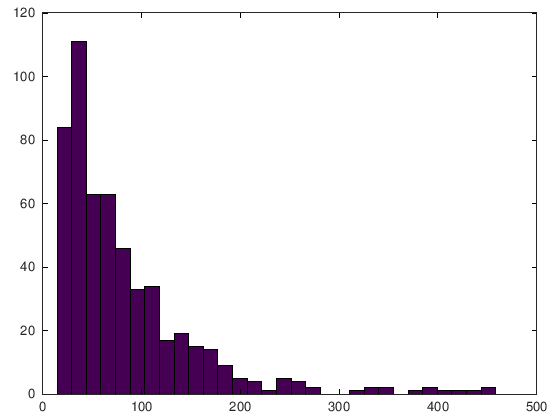

In [ ]:
%%octave
# @title Detected photon output data format

detp = loadjson('colin27_detp.jdat');
fieldnames(detp.MCXData)

detp.MCXData.Info

detid=detp.MCXData.PhotonData.detid;
ppath=detp.MCXData.PhotonData.ppath;
prop = squeeze(cell2mat(struct2cell(detp.MCXData.Info.Media)))';

hist(ppath(detid==1,1),30)


mcxmeanpath(detp.MCXData.PhotonData, prop)

{'Version': 1, 'MediaNum': 6, 'DetNum': 4, 'ColumnNum': 13, 'TotalPhoton': 1000000, 'DetectedPhoton': 657, 'SavedPhoton': 657, 'LengthUnit': 1, 'SeedByte': 0, 'Normalizer': 200, 'Repeat': 1, 'SrcNum': 1, 'SaveDetFlag': 53, 'TotalSource': 1, 'Media': [{'mua': 0, 'mus': 1.19209289550781e-07, 'g': 1, 'n': 1}, {'mua': 0.0189999993890524, 'mus': 7.81820011138916, 'g': 0.8899999856948853, 'n': 1.3700000047683716}, {'mua': 0.0189999993890524, 'mus': 7.81820011138916, 'g': 0.8899999856948853, 'n': 1.3700000047683716}, {'mua': 0.00400000018998981, 'mus': 0.00899999961256981, 'g': 0.8899999856948853, 'n': 1.3700000047683716}, {'mua': 0.0199999995529652, 'mus': 9, 'g': 0.8899999856948853, 'n': 1.3700000047683716}, {'mua': 0.0799999982118607, 'mus': 40.900001525878906, 'g': 0.8399999737739563, 'n': 1.3700000047683716}, {'mua': 0, 'mus': 1.19209289550781e-07, 'g': 1, 'n': 1}]}


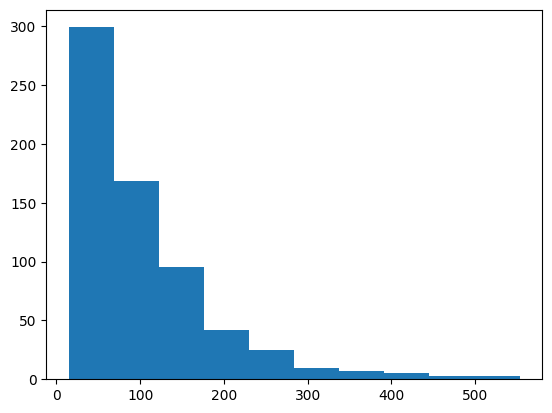

In [ ]:
# @title Detected photon output data format
import jdata as jd
import numpy as np
from matplotlib import pyplot as plt

detp = jd.load('colin27_detp.jdat')   # load JSON/JNIFTI file using jdata.load() function
print(detp['MCXData']['Info'])

detid=detp['MCXData']['PhotonData']['detid']
ppath=detp['MCXData']['PhotonData']['ppath']

plt.hist(ppath[:, 0])
plt.show()

### Saving photon trajectories

MCX has the capability to save the trajectories of all simulated photon packets. A photon's trajectory is intuitive to visualize. However, before one starts using this feature, **one must reconginize the following limitations:**

- saving photon trajectories requires a lot of GPU memory, CPU memory and disk space; savig the full trajectory data for 1e6 photo packets can easily fill out the entire GPU memory
- because of high memory access (which is the slowest part of GPU computing), the simulation speed can be an order of magnitude slower
- a common mistake among users is to treat each photo packet trajectory equivallent to another, as if they are from binary/quantum photons. One must recognize that each simulated photon packet in MCX has different weights and such weight varies along its trajectory. To compute any physically meaningful quantity, one must carefully consider the weighted nature of each trajectory segment. To rigirously process large amount of weight-varying trajectory data can be very time consuming and prone to error.
- a saved photon trajectory is merely a random sample from a continuous distribution of photon distributions; one can not treat such trajectory without considering its stochastic nature - for example, one can not use it to determine the maximum penetration of photon because when you simulate another set of photons, such trajectory will change
- please consider using the volumetric output (fluence-rate, fluence, energy deposition, Jacobian etc) instead of post-processing trajectory data manually. Effectively, the volumetric outputs were derived from such trajectories internally by MCX using GPU parallel threads; they were physically meaningful, unbiased and computed efficiently.

Nonetheless, we do recognize the benefit of exporting photon trajectories for the purpose of debugging photon propagations (such as reflection/transmission). You should consider using only a small amount of photon when saving trajectories and do not over-interpret the results.

To save photon trajectories, one should add letter `M` following the debug flag `-D` or `--debug`. The output data are saved in a JSON encoded data file `session_name_traj.jdat`. For example

In [ ]:
!mcx --bench cube60 -n 100  -D M  -S 0  -d 0 # to speed up this demo, we use -S/--save2pt 0 to disable volumetric output and -d/--savedet 0 to disable detected photon data
!jq '.MCXData.Trajectory | keys' cube60_traj.jdat

###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

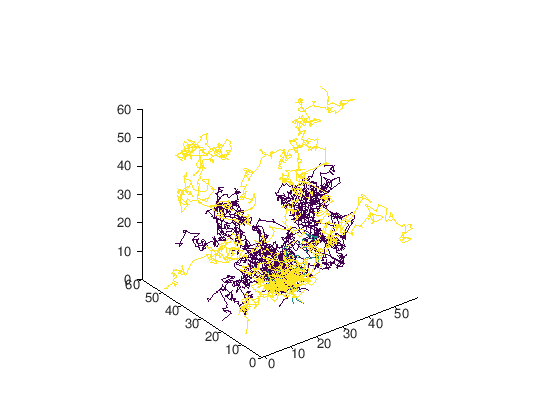

In [ ]:
%%octave
# @title Loading photon trajectory data in MATLAB/Octave

trajdata=loadjson('cube60_traj.jdat');
trajdata=trajdata.MCXData.Trajectory;
traj=struct('id', trajdata.photonid, 'pos', trajdata.p, 'data', [trajdata.photonid, trajdata.p, trajdata.w0]');

mcxplotphotons(traj)

In [ ]:
# @title Loading photon trajectory data in Python

import jdata as jd
import numpy as np
from matplotlib import pyplot as plt

traj=jd.load('cube60_traj.jdat')
traj=traj['MCXData']['Trajectory']

print(traj['p'].shape)
print(traj.keys())

(8127, 3)
dict_keys(['photonid', 'p', 'w0', 'srcid'])


A side note - another commonly used debug flag is `-D P` to print simulation progress bar.

In [ ]:
!mcx --bench colin27 -n 1e6 -D P

## Command line "modify-all" flag `-j/--json`

MCX reads user's input primarily from the input JSON file (when `--bench` is used, the built-in JSON input file is loaded instead). However, one can modify nearly every aspect of the simulation settings in the command line using the `-j` or `--json` flag.

Here is an example how it works: let's change the source type from a `pencil` beam to an `isotropic` source for the `cube60` benchmark, and also move the source position from [29,29,0] to [29,10,0]

In [ ]:
%%shell

# modify the simulation settings using -j and dump the combined JSON input
mcx --bench cube60 -j '{"Optode":{"Source":{"Type":"isotropic","Pos":[29,10,0]}}}' --dumpjson
# run the simulation after modification - notice the total absorption fraction drops from 17.7% to 5%
mcx --bench cube60 -j '{"Optode":{"Source":{"Type":"isotropic","Pos":[29,10,0]}}}'

Here is another example that you can build sophisticated domains at simulation run-time via the `-j` flag.

In [ ]:
%%shell

# modify media optical properties and add shapes at run-time
# notice that Domain.Media JSON field also accept array-of-1x4-vector input

newsetting='{"Domain":{"Media":[[0,0,1,1],[0.02,1,0,1],[0.02,1,0.7,1.3],[0.4,1,0,1.4]]},"Shapes":[{"ZLayers":[[2,10,2]]},{"Sphere":{"Tag":3,"O":[20,20,20],"R":10}}]}'
echo $newsetting | jq '.'

mcx --bench cube60b -j $newsetting --dumpjson
mcx --bench cube60b -j $newsetting

Using a combination of the built-in benchmarks and the `-j` flag, we have dynamically created various simulation settings in our MCX built-in unit-testing script to validate many of the simulation features provided by the software. Please take a look at our [testmcx.sh shell script](https://github.com/fangq/mcx/blob/master/test/testmcx.sh) to see extended use of this flag.

In [ ]:
# @title Run built-in unit tests in the command line mode
# if all tests have passed, you should see "passed all tests!" printed at the end

!MCXStudio/MCXSuite/mcx/test/testmcx.sh

## Command line user input parsing order

<font color='red'>later command line flags</font> > <font color='orange'>earlier command line flags</font> > <font color='green'>`-j`/`--json` modifier</font> > <font color='blue'>JSON input file</font> > <font color='navy'>MCX default settings</a>

In [ ]:
# print the simulated photon number for built-in benchmark spherebox
! mcx --bench spherebox --dumpjson | jq '.Session.Photons'

# specify the photon number via -n flag to overwrite the input file
! mcx --bench spherebox -n 1e4 --dumpjson | jq '.Session.Photons'

# specify the photon number via -j flag to overwrite the input file
! mcx --bench spherebox -j '{"Session":{"Photons":2e3}}' --dumpjson | jq '.Session.Photons'

# when both -n and -j are both provided, -n takes priority; when multiple -n are given, later flag takes priority
! mcx --bench spherebox -n 1e4 -j '{"Session":{"Photons":2e3}}' -n 1e3 -j '{"Session":{"Photons":1e5}}'  --dumpjson | jq '.Session.Photons'

# MCX JSON input file playground

To wrap up this training unit, here is a full JSON input file that user can adjust various settings

In [ ]:
%%shell
# @title MCX input file playground
# you can simply edit any setting, as long as it matches the desired format in the below JSON file
# you can also use the form on the right to togle b

session="mytest" # @param {type:"string"}
outputtype="x" # @param ["x","f","e"]
outputformat="jnii" # @param ["jnii","nii","mc2","bnii"]
srctype="pencil" # @param ["pencil", "isotropic", "cone", "gaussian", "planar","fourier", "arcsine", "disk", "fourierx", "fourierx2d", "zgaussian", "line", "slit", "pencilarray", "hyperboloid", "ring"]
srcpos="29.5, 29.5, 0" # @param {type: "raw"}
srcdir="0, 0, 1"       # @param {type: "raw"}
srcparam1="0, 0, 0, 0" # @param {type: "raw"}
srcparam2="0, 0, 0, 0" # @param {type: "raw"}

cat << EOF > mytest_input.json
{
  "Session":  {
    "ID":  "$session",
    "Photons":  1000000,
    "RNGSeed":  1648335518,
    "DoMismatch":  false,
    "OutputType":  "$outputtype",
    "OutputFormat":  "$outputformat"
  },
  "Forward":  {
    "T0":  0,
    "T1":  5e-9,
    "Dt":  1e-10
  },
  "Domain":  {
    "Media":  [
      {"mua":  0, "mus":  0, "g":  1, "n":  1  },
      {"mua":  0.002, "mus":  1.0, "g":  0.001, "n":  1.37},
      {"mua":  0.05, "mus":  5, "g":  0.9, "n":  1.37}
    ],
    "Dim":  [60, 60, 60],
    "OriginType":  1
  },
  "Optode":  {
    "Source":  {
      "Type":  "$srctype",
      "Pos":  [$srcpos],
      "Dir":  [$srcdir],
      "Param1":  [$srcparam1],
      "Param2":  [$srcparam2]
    },
    "Detector":  [{
        "Pos":  [29, 25, 0], "R":  1
      }]
  },
  "Shapes": [
    {"Grid": {"Tag": 1, "Size":  [60, 60, 60]}},
    {"Sphere": {"Tag":  2, "O":  [30, 30, 30],"R":  10}}
  ]
}
EOF

mcx -f mytest_input.json

ls $session*